
"""

This code just combines the all the Datasets together.

"""


# Import the code 


In [1]:

#fileloc  = '/mnt/batch/tasks/shared/LS_root/mounts/clusters/compute-one/code/Users/karan.bhatti'
fileloc  = '/mnt/batch/tasks/shared/LS_root/mounts/clusters/compute-one-8c-32gb/code/Users/karan.bhatti'

import sys
print(sys.path)
print()
#sys.path.append(f'{fileloc}')
print()
#print(sys.path)


['/mnt/batch/tasks/shared/LS_root/mounts/clusters/compute-one-8c-32gb/code/Users/karan.bhatti', '/anaconda/envs/azureml_py38/lib/python38.zip', '/anaconda/envs/azureml_py38/lib/python3.8', '/anaconda/envs/azureml_py38/lib/python3.8/lib-dynload', '', '/anaconda/envs/azureml_py38/lib/python3.8/site-packages', '/anaconda/envs/azureml_py38/lib/python3.8/site-packages/azureml/_project/vendor', '/anaconda/envs/azureml_py38/lib/python3.8/site-packages/azureml/automl/core/_vendor']




In [2]:

class Data(object):
    pass

df = Data
summ = Data


In [3]:
import helpdesk as hd

In [4]:

import pandas as pd, numpy as np
from datetime import datetime


In [5]:
DEBUG = True

In [6]:

pd.set_option('display.max_rows', 50);
pd.set_option('display.max_columns', 50);
pd.set_option('display.width', 200);


In [7]:

# Importing Dog Race Results

#res_raw = pd.read_csv('C:\\Users\\karan\\Documents\\Data\\racing\\FastTrack\\Past\\dog_results_20211201_20211231.csv')
#df.res_raw = pd.read_csv('C:\\Users\\karan\\Documents\\Data\\racing\\FastTrack\\Past\\dog_results_20220101_20220531.csv')

print(f'{fileloc}/dog_results_2012Q1_2021Q4.csv')

df.res_raw_2021Q1Q4 = pd.read_csv(f'{fileloc}/dog_results_2021Q1_2021Q4.csv')
print(df.res_raw_2021Q1Q4.columns.values.tolist())
print(df.res_raw_2021Q1Q4.shape)

print(f'{fileloc}/dog_results_2022Q1_2022Q2.csv')
df.res_raw_2022Q1Q2 = pd.read_csv(f'{fileloc}/dog_results_2022Q1_2022Q2.csv')
print(df.res_raw_2022Q1Q2.columns.values.tolist())
print(df.res_raw_2022Q1Q2.shape)

print(f'{fileloc}/dog_results_2022M10_2022M11.csv')
df.res_raw_2022M10M11 = pd.read_csv(f'{fileloc}/dog_results_2022M10_2022M11.csv')
print(df.res_raw_2022M10M11.columns.values.tolist())
print(df.res_raw_2022M10M11.shape)



/mnt/batch/tasks/shared/LS_root/mounts/clusters/compute-one-8c-32gb/code/Users/karan.bhatti/dog_results_2012Q1_2021Q4.csv
['@id', 'Place', 'DogName', 'Box', 'Rug', 'Weight', 'StartPrice', 'Handicap', 'Margin1', 'Margin2', 'PIR', 'Checks', 'Comments', 'SplitMargin', 'RunTime', 'Prizemoney', 'RaceId', 'TrainerId', 'TrainerName']
(435715, 19)
/mnt/batch/tasks/shared/LS_root/mounts/clusters/compute-one-8c-32gb/code/Users/karan.bhatti/dog_results_2022Q1_2022Q2.csv
['@id', 'Place', 'DogName', 'Box', 'Rug', 'Weight', 'StartPrice', 'Handicap', 'Margin1', 'Margin2', 'PIR', 'Checks', 'Comments', 'SplitMargin', 'RunTime', 'Prizemoney', 'RaceId', 'TrainerId', 'TrainerName']
(320052, 19)
/mnt/batch/tasks/shared/LS_root/mounts/clusters/compute-one-8c-32gb/code/Users/karan.bhatti/dog_results_2022M10_2022M11.csv
['@id', 'Place', 'DogName', 'Box', 'Rug', 'Weight', 'StartPrice', 'Handicap', 'Margin1', 'Margin2', 'PIR', 'Checks', 'Comments', 'SplitMargin', 'RunTime', 'Prizemoney', 'RaceId', 'TrainerId', 

In [8]:

df.res_raw = df.res_raw_2021Q1Q4.append( df.res_raw_2022Q1Q2 ).append( df.res_raw_2022M10M11 )
print( df.res_raw.columns.values.tolist() )
print( df.res_raw.shape )


['@id', 'Place', 'DogName', 'Box', 'Rug', 'Weight', 'StartPrice', 'Handicap', 'Margin1', 'Margin2', 'PIR', 'Checks', 'Comments', 'SplitMargin', 'RunTime', 'Prizemoney', 'RaceId', 'TrainerId', 'TrainerName']
(826584, 19)


In [9]:

df.res_raw.loc[:,"DogName"] = df.res_raw["DogName"].str.replace("'","").str.replace(".","")
if DEBUG: print(df.res_raw.shape) 
# 320 052
# 826 584

#if DEBUG: res_raw[ ~(res_raw.Place.isin( ['D','F','N','R','S','T',''])) ].shape # 66608
if DEBUG: print(df.res_raw[ ~(df.res_raw.Place.isin( ['R','S'])) ].shape) 
# 275 864
# 710 179

df.res_raw2 = df.res_raw[ ~(df.res_raw.Place.isin( ['R','S']))  ]
df.res_ = df.res_raw2[~df.res_raw2.Place.isna()]
if DEBUG: print(df.res_.shape) 
# 273 735
# 705 255

del df.res_raw, df.res_raw2

#res_ = res_raw


(826584, 19)
(710179, 19)
(705255, 19)


In [12]:

# Importing Race Details 

#race_raw = pd.read_csv('C:\\Users\\karan\\Documents\\Data\\racing\\FastTrack\\Past\\race_details_20211201_20211231.csv', parse_dates = True)
#df.race_raw = pd.read_csv('C:\\Users\\karan\\Documents\\Data\\racing\\FastTrack\\Past\\race_details_20220101_20220531.csv', parse_dates = True)

print()
print(f'{fileloc}/race_details_2021Q1_2021Q4.csv')
df.race_raw_2021Q1Q4 = pd.read_csv(f'{fileloc}/race_details_2021Q1_2021Q4.csv', parse_dates = True)
print(df.race_raw_2021Q1Q4.columns.values.tolist())
print(df.race_raw_2021Q1Q4.shape)

print()
print(f'{fileloc}/race_details_2022Q1_2022Q2.csv')
df.race_raw_2022Q1Q2 = pd.read_csv(f'{fileloc}/race_details_2022Q1_2022Q2.csv', parse_dates = True)
print(df.race_raw_2022Q1Q2.columns.values.tolist())
print(df.race_raw_2022Q1Q2.shape)

print()
print(f'{fileloc}/race_details_2022M10_2022M11.csv')
df.race_raw_2022M10M11 = pd.read_csv(f'{fileloc}/race_details_2022M10_2022M11.csv', parse_dates = True)
print(df.race_raw_2022M10M11.columns.values.tolist())
print(df.race_raw_2022M10M11.shape)



/mnt/batch/tasks/shared/LS_root/mounts/clusters/compute-one-8c-32gb/code/Users/karan.bhatti/race_details_2022Q1_2022Q2.csv
['@id', 'RaceNum', 'RaceName', 'RaceTime', 'Distance', 'RaceGrade', 'Track', 'date']
(38562, 8)

/mnt/batch/tasks/shared/LS_root/mounts/clusters/compute-one-8c-32gb/code/Users/karan.bhatti/race_details_2021Q1_2021Q4.csv
['@id', 'RaceNum', 'RaceName', 'RaceTime', 'Distance', 'RaceGrade', 'Track', 'date']
(51833, 8)

/mnt/batch/tasks/shared/LS_root/mounts/clusters/compute-one-8c-32gb/code/Users/karan.bhatti/race_details_2022M10_2022M11.csv
['@id', 'RaceNum', 'RaceName', 'RaceTime', 'Distance', 'RaceGrade', 'Track', 'date']
(8410, 8)


In [11]:

df.race_raw = df.race_raw_2021Q1Q4.append( df.race_raw_2022Q1Q2 ).append( df.race_raw_2022M10M11 )
print(df.race_raw.columns.values.tolist())
print(df.race_raw.shape)


['@id', 'RaceNum', 'RaceName', 'RaceTime', 'Distance', 'RaceGrade', 'Track', 'date']
(98805, 8)


In [13]:

df.race_raw['Event_Dt'] = pd.to_datetime(df.race_raw['date']).dt.date

#dtvalct = race_raw.Event_Dt.value_counts()

df.race_raw.loc[df.race_raw.Track.isin(['Murray Bridge (MBR)','Murray Bridge (MBS)']), "Track"] = 'Murray Bridge'
df.race_raw.loc[df.race_raw.Track.isin(['Richmond (RIS)']), "Track"] = 'Richmond'

df.race_raw.loc[df.race_raw.Track.isin(['Sandown (SAP)']), "Track"] = 'Sandown Park'

df.race_raw.loc[df.race_raw.Track.isin(['Meadows (MEP)']), "Track"] = 'Meadows'
df.race_raw.loc[df.race_raw.Track.isin(['The Meadows']), "Track"] = 'Meadows'


if DEBUG : print(df.race_raw.shape)

# 2021
# 52,103 Races

# 2022 upto May
# 21,002 Races

# 2022 Q1/Q2
# 38,562 Races

# 2022 Q1/Q2 + 2021 Q1/Q2/Q3/Q4
# 81,412 Races

# 2022 Q1/Q2/Q3/M11 + 2021 Q1/Q2/Q3/Q4
# 98805 (AUS + NZ), 89098 (AUS)

df.race_ = df.race_raw[ ~df.race_raw.Track.str.contains('NZ')]

if DEBUG : print(df.race_.shape)

del df.race_raw

if DEBUG: print(df.race_.dtypes)



(98805, 9)
(89098, 9)
@id           int64
RaceNum       int64
RaceName     object
RaceTime     object
Distance     object
RaceGrade    object
Track        object
date         object
Event_Dt     object
dtype: object


In [14]:

if DEBUG:
    print(df.res_.columns.values.tolist())
    print(df.race_.columns.values.tolist())
    
    print(df.res_.shape)
    print(df.race_.shape)

df.ft_raw = pd.merge(df.res_, df.race_, left_on = 'RaceId', right_on = '@id', how = 'inner', suffixes=('_DOG', '_RACE'))
if DEBUG: print(df.ft_raw.shape)

# 2021
# 333,285

# 2022 upto May
# 132,558

# 2022 Q1/Q2
# 245,827

# 2022 Q1/Q2 + 2021 Q1/Q2/Q3/Q4
# 245,827

# 2022 Q1/Q2/Q3/M11 + 2021 Q1/Q2/Q3/Q4
# 245,827
# 632,501

#qc_DogName = df.ft_merg.DogName.value_counts()


['@id', 'Place', 'DogName', 'Box', 'Rug', 'Weight', 'StartPrice', 'Handicap', 'Margin1', 'Margin2', 'PIR', 'Checks', 'Comments', 'SplitMargin', 'RunTime', 'Prizemoney', 'RaceId', 'TrainerId', 'TrainerName']
['@id', 'RaceNum', 'RaceName', 'RaceTime', 'Distance', 'RaceGrade', 'Track', 'date', 'Event_Dt']
(705255, 19)
(89098, 9)
(632501, 28)


### A) Prepare the Base Dataset -- Exclusions (Missing ft sp, place info, Margin1, num_dogs)

In [15]:

print(df.ft_raw.columns.values.tolist())


['@id_DOG', 'Place', 'DogName', 'Box', 'Rug', 'Weight', 'StartPrice', 'Handicap', 'Margin1', 'Margin2', 'PIR', 'Checks', 'Comments', 'SplitMargin', 'RunTime', 'Prizemoney', 'RaceId', 'TrainerId', 'TrainerName', '@id_RACE', 'RaceNum', 'RaceName', 'RaceTime', 'Distance', 'RaceGrade', 'Track', 'date', 'Event_Dt']


In [17]:

# Find the Places to be removed
print( pd.DataFrame(df.ft_raw['Place'].value_counts()).transpose() )


           1      2      3      4      5      6      7      8     F     T     N   3=   4=   2=   5=   1=   6=    P   7=   B   D
Place  88243  87851  87605  87264  85843  79849  63950  42858  3738  1319  1127  504  475  452  401  332  293  239  120  24  14


In [18]:

# Delete races where ft_sp is blank
all_races = df.ft_raw['@id_RACE'].unique().tolist()
print(len(all_races))
print()

print("# Part 1 - Removing Races with missing fast track prices - can't be measured for performance")
# Clean the fast track prices
df.ft_raw['ft_sp'] = df.ft_raw.StartPrice.apply(lambda x : float(str(x).replace("$","").replace("F","")) )

blank_ft_sp_races = df.ft_raw[df.ft_raw['ft_sp'].isna()]['@id_RACE'].unique().tolist()
#print(len(blank_ft_sp_races))
df_base0 = df.ft_raw[ ( ~df.ft_raw['@id_RACE'].isin(blank_ft_sp_races) ) ]
print(f"Shape : {df_base0.shape}, Races : {len(df_base0['@id_RACE'].unique().tolist())}, Race w missing fast track prices : {len(blank_ft_sp_races)}")
print()

print("# Part 2 - Removing Races with Missing Place Information")
place_to_remove = ['F','T','N','P','B','D']
races_excl_pos = df_base0[df_base0['Place'].isin(place_to_remove)]['@id_RACE'].unique().tolist()
#print(len(races_excl_pos))

df_base1 = df_base0[ ( ~df_base0['@id_RACE'].isin(races_excl_pos) ) ]
print(f"Shape : {df_base1.shape}, Races : {len(df_base1['@id_RACE'].unique().tolist())}, Races w missing Place : {len(races_excl_pos)}")
print()

print("# Part 3 - Removing Races with no Missing Margin1 information")
races_excl_margin = df_base1[df_base1['Margin1'].isna()]['@id_RACE'].unique().tolist()
#print(len(races_excl_margin))

df_base2 = df_base1[ ( ~df_base1['@id_RACE'].isin(races_excl_margin) ) ]
print(f"Shape : {df_base2.shape}, Races : {len(df_base2['@id_RACE'].unique().tolist())}, Races w missing Margin : {len(races_excl_margin)}")

del df_base0, df_base1


88561

# Part 1 - Removing Races with missing fast track prices - can't be measured for performance
Shape : (623914, 29), Races : 87009, Race w missing fast track prices : 1552

# Part 2 - Removing Races with Missing Place Information
Shape : (593160, 29), Races : 82880, Races w missing Place : 4129

# Part 3 - Removing Races with no Missing Margin1 information
Shape : (593135, 29), Races : 82861, Races w missing Margin : 19


In [19]:

print("# Part 4 - Removing Races with under 5 dogs")
df_num_dogs = df_base2.groupby("@id_RACE").agg( { '@id_DOG':'nunique' } ).reset_index().rename(columns = {'@id_DOG':'x_num_dogs'})

print(df_num_dogs.shape)
print(df_base2.shape)
print()

df_base3 = pd.merge( df_base2, df_num_dogs, on = ["@id_RACE"], how = 'left')
print(df_base3.columns.values.tolist())
print()

races_u5dogs = df_base3[df_base3.x_num_dogs.isin([1,2,3,4])]['@id_RACE'].unique().tolist()
print(len(races_u5dogs))
print()

print( len(df_base3['@id_RACE'].unique().tolist()))
df_base = df_base3[ ( ~df_base3['@id_RACE'].isin(races_u5dogs) ) ].copy()   
print()

#print(df.ft.shape)
print(f"Shape : {df_base.shape}, Races : {len(df_base['@id_RACE'].unique().tolist())}, Races u5 Dogs : {len(races_u5dogs)}")
print()

del df_base2, df_base3


# Part 4 - Removing Races with under 5 dogs
(82861, 2)
(593135, 29)

['@id_DOG', 'Place', 'DogName', 'Box', 'Rug', 'Weight', 'StartPrice', 'Handicap', 'Margin1', 'Margin2', 'PIR', 'Checks', 'Comments', 'SplitMargin', 'RunTime', 'Prizemoney', 'RaceId', 'TrainerId', 'TrainerName', '@id_RACE', 'RaceNum', 'RaceName', 'RaceTime', 'Distance', 'RaceGrade', 'Track', 'date', 'Event_Dt', 'ft_sp', 'x_num_dogs']

1340

82861

Shape : (588017, 30), Races : 81521, Races u5 Dogs : 1340



In [20]:
df_base.sort_values(by = ['@id_DOG', 'DogName', 'Event_Dt'], inplace = True)

In [21]:

#df_base0[df_base0.DogName.isin(['FOURTH DIMENTION'])].head()
df_base[df_base['@id_RACE'].isin([631783547]) ]


,@id_DOG,Place,DogName,Box,Rug,Weight,StartPrice,Handicap,Margin1,Margin2,PIR,Checks,Comments,SplitMargin,RunTime,Prizemoney,RaceId,TrainerId,TrainerName,@id_RACE,RaceNum,RaceName,RaceTime,Distance,RaceGrade,Track,date,Event_Dt,ft_sp,x_num_dogs
10697,114244064,2,FOURTH DIMENTION,3.0,3,33.4,$4.20,NaN,0.39,0.39,M/22,1,NaN,8.36,22.75,NaN,631783547,131578,P Pollutro,631783547,7,TAB - LONG MAY WE PLAY,05:15PM,400m,Grade 5 T3,Warragul,14 Jan 21,2021-01-14,4.2,8
10698,157829531,3,TUI,4.0,4,29.3,$8.50,NaN,3.60,3.21,M/43,4,NaN,8.47,22.97,NaN,631783547,110965,C Haigh,631783547,7,TAB - LONG MAY WE PLAY,05:15PM,400m,Grade 5 T3,Warragul,14 Jan 21,2021-01-14,8.5,8
10701,164415675,6,BIG PLANS,2.0,2,39.7,$9.10,NaN,8.80,1.21,M/68,0,NaN,8.62,23.34,NaN,631783547,255489,K Thorburn,631783547,7,TAB - LONG MAY WE PLAY,05:15PM,400m,Grade 5 T3,Warragul,14 Jan 21,2021-01-14,9.1,8
10700,184236240,5,CEE JAY ACE,1.0,1,33.0,$2.80F,NaN,7.59,2.23,S/86,1,NaN,8.73,23.25,NaN,631783547,283109,L Dalziel,631783547,7,TAB - LONG MAY WE PLAY,05:15PM,400m,Grade 5 T3,Warragul,14 Jan 21,2021-01-14,2.8,8
10699,190918076,4,BANJO PLATO,8.0,8,33.1,$14.10,NaN,5.36,1.76,S/75,0,NaN,8.64,23.10,NaN,631783547,65076,D Belsham,631783547,7,TAB - LONG MAY WE PLAY,05:15PM,400m,Grade 5 T3,Warragul,14 Jan 21,2021-01-14,14.1,8
10702,224008138,7,HEIDI INTENTION,7.0,7,25.7,$6.20,NaN,14.94,6.14,M/57,11,NaN,8.48,23.77,NaN,631783547,27599,J Caley,631783547,7,TAB - LONG MAY WE PLAY,05:15PM,400m,Grade 5 T3,Warragul,14 Jan 21,2021-01-14,6.2,8
10696,314053857,1,PARUMBA BARCIA,6.0,6,30.2,$14.50,NaN,0.39,NaN,M/11,1,NaN,8.29,22.72,NaN,631783547,132501,E Lieshout,631783547,7,TAB - LONG MAY WE PLAY,05:15PM,400m,Grade 5 T3,Warragul,14 Jan 21,2021-01-14,14.5,8
10703,340020191,8,HURRICANE PETE,5.0,5,32.7,$18.10,NaN,16.19,1.24,M/34,15,NaN,8.43,23.85,NaN,631783547,69852,J Sultana,631783547,7,TAB - LONG MAY WE PLAY,05:15PM,400m,Grade 5 T3,Warragul,14 Jan 21,2021-01-14,18.1,8


In [22]:

# Fix the position Variable
df_base['position'] = df_base.Place.apply(lambda x : x.replace("=","") if x in ['1=','2=','3=','4=','5=','6=','7=','8='] else x).astype(int)
print(pd.DataFrame(df_base.position.value_counts()).transpose())


              1      2      3      4      5      6      7      8
position  81676  81581  81541  81509  81484  76107  61361  42758


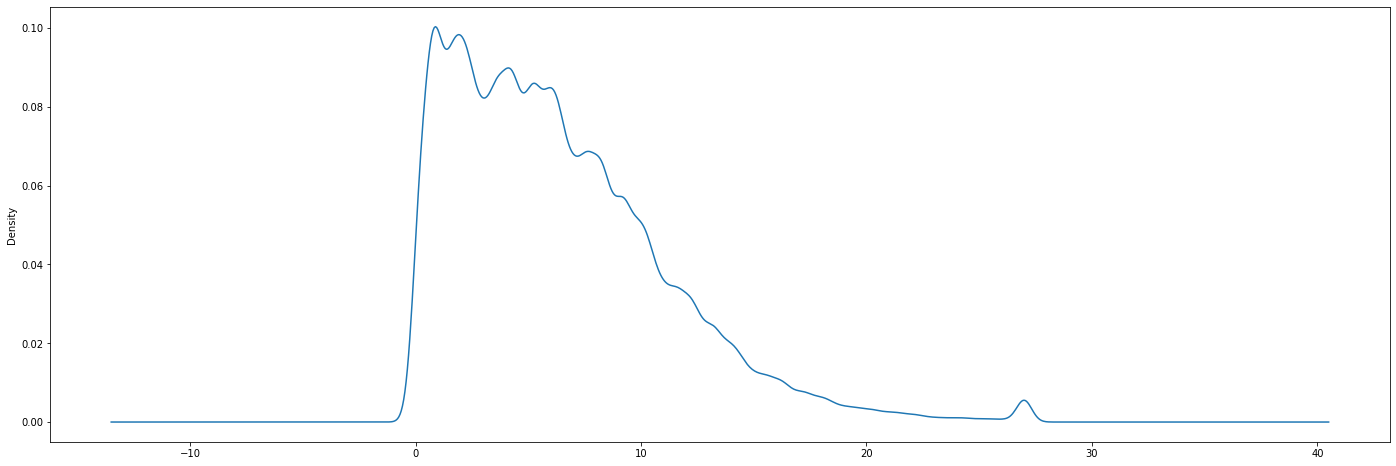

In [23]:

# Fix the Margin variables - is the same for 1 and 2
df_base['y_margin'] = df_base.apply(lambda x : 0 if x.position == '1' else 27 if x.Margin1 > 27 else x.Margin1, axis = 1) # capping at 99%ile of Margin1

df_base['y_margin'].plot(kind = 'density', figsize = (24,8))


In [24]:

# Create the y variable for position
df_base['y_pos'] = df_base['position'].astype(int)


In [ ]:

# Checking the 99 percentile of the x_margin variable

#from scipy import stats
#stats.percentileofscore(df_base['x_margin'].values, 15, kind='mean')


In [25]:

df_base.describe()


,@id_DOG,Box,Rug,Weight,Handicap,Margin1,Margin2,Checks,SplitMargin,RunTime,Prizemoney,RaceId,TrainerId,@id_RACE,RaceNum,ft_sp,x_num_dogs,position,y_margin,y_pos
count,5.880170e+05,588017.000000,588017.000000,588016.000000,0.0,588017.000000,506341.000000,588017.000000,489326.000000,588017.000000,404411.000000,5.880170e+05,588017.000000,5.880170e+05,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000
mean,4.619574e+08,4.477804,4.584839,29.925088,NaN,6.452314,2.061646,0.526102,7.284412,24.391543,426.354001,7.386968e+08,110234.634871,7.386968e+08,6.161113,16.986033,7.341031,4.168502,6.365959,4.168502
std,1.145309e+08,2.344385,2.432500,3.321114,NaN,8.736779,7.862522,1.582459,2.515969,4.945432,2908.677114,6.357945e+07,77018.376912,6.357945e+07,3.281445,21.050777,0.893514,2.162005,4.765762,2.162005
min,1.083910e+08,1.000000,1.000000,18.700000,NaN,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,6.238619e+08,6418.000000,6.238619e+08,1.000000,0.260000,5.000000,1.000000,0.000000,1.000000
25%,4.005005e+08,2.000000,2.000000,27.200000,NaN,2.500000,0.570000,0.000000,5.500000,20.540000,0.000000,6.854128e+08,65398.000000,6.854128e+08,3.000000,4.200000,7.000000,2.000000,2.500000,2.000000
50%,4.569441e+08,4.000000,4.000000,29.900000,NaN,5.500000,1.400000,0.000000,6.780000,23.520000,20.000000,7.402821e+08,99417.000000,7.402821e+08,6.000000,8.800000,8.000000,4.000000,5.500000,4.000000
75%,5.405822e+08,7.000000,7.000000,32.500000,NaN,9.030000,2.660000,0.000000,8.760000,27.070000,420.000000,7.922435e+08,123529.000000,7.922435e+08,9.000000,20.800000,8.000000,6.000000,9.030000,6.000000
max,2.145360e+09,8.000000,10.000000,55.000000,NaN,5229.500000,5100.140000,25.000000,30.660000,396.120000,1000000.000000,8.483914e+08,335222.000000,8.483914e+08,20.000000,999.990000,8.000000,8.000000,27.000000,8.000000


In [26]:

print(pd.DataFrame(df_base.isna().sum()).transpose())


   @id_DOG  Place  DogName  Box  Rug  Weight  StartPrice  Handicap  Margin1  Margin2    PIR  Checks  Comments  SplitMargin  RunTime  Prizemoney  RaceId  TrainerId  TrainerName  @id_RACE  RaceNum  \
0        0      0        0    0    0       1           0    588017        0    81676  78666       0    284915        98691        0      183606       0          0            0         0        0   

   RaceName  RaceTime  Distance  RaceGrade  Track  date  Event_Dt  ft_sp  x_num_dogs  position  y_margin  y_pos  
0        15         0         0          0      0     0         0      0           0         0         0      0  


In [27]:

df_base.agg({'TrainerName':'nunique', 'Track':'nunique', 'DogName':'nunique'})


TrainerName     3587
Track             58
DogName        26823
dtype: int64

In [28]:
pd.set_option('display.max_rows', 50)

In [29]:

print(datetime.now().date())


2022-12-03


In [30]:

print(df_base.columns.values.tolist())


['@id_DOG', 'Place', 'DogName', 'Box', 'Rug', 'Weight', 'StartPrice', 'Handicap', 'Margin1', 'Margin2', 'PIR', 'Checks', 'Comments', 'SplitMargin', 'RunTime', 'Prizemoney', 'RaceId', 'TrainerId', 'TrainerName', '@id_RACE', 'RaceNum', 'RaceName', 'RaceTime', 'Distance', 'RaceGrade', 'Track', 'date', 'Event_Dt', 'ft_sp', 'x_num_dogs', 'position', 'y_margin', 'y_pos']


In [31]:

print(df_base.position.value_counts())


1    81676
2    81581
3    81541
4    81509
5    81484
6    76107
7    61361
8    42758
Name: position, dtype: int64


In [32]:

#keep_cols_for_export = ['@id_DOG', 'DogName', '@id_RACE','RaceName','Track','RaceGrade','Distance','TrainerName','RunTime','Place','x_races_tot']

# 'TrainerName', 'Track' have been dummified
#cols_to_keep = ['@id_DOG', 'DogName', 'y_runtime', 'RaceId', '@id_RACE', 'position', 'ft_sp', 'x_num_dogs', 'Top3_actual', 'position_random', 'position_fasttrack', 'Winner_fastrack', 'Top3_fastrack', 'Winner_actual', 'Winner_random', 'Top3_random', 'RaceGrade', 'Track']

'''
cols_for_drop = [ 'Place', 'Box', 'Rug', 'Weight', 'StartPrice', 'Handicap', 'Margin1', 'Margin2', 'PIR', 'Checks', 'Comments', 'SplitMargin' \
                 , 'Prizemoney', 'TrainerId', 'TrainerName', 'RaceNum', 'RaceName', 'RaceTime', 'date' \
                 , 'rand_mean', 'rand_uniform']
'''

cols_for_drop = []

#'Event_Dt', 

todaydt = datetime.now().date()
exp_fname = f'raw_base_{todaydt}.csv'

exp_ds = df_base.drop( columns = cols_for_drop ).rename( columns = { 'RunTime' : 'y_runtime' } )



In [33]:

print(exp_ds.shape)


(588017, 33)


In [34]:

print(exp_ds.columns.values.tolist())


['@id_DOG', 'Place', 'DogName', 'Box', 'Rug', 'Weight', 'StartPrice', 'Handicap', 'Margin1', 'Margin2', 'PIR', 'Checks', 'Comments', 'SplitMargin', 'y_runtime', 'Prizemoney', 'RaceId', 'TrainerId', 'TrainerName', '@id_RACE', 'RaceNum', 'RaceName', 'RaceTime', 'Distance', 'RaceGrade', 'Track', 'date', 'Event_Dt', 'ft_sp', 'x_num_dogs', 'position', 'y_margin', 'y_pos']


In [35]:

exp_ds.head()


,@id_DOG,Place,DogName,Box,Rug,Weight,StartPrice,Handicap,Margin1,Margin2,PIR,Checks,Comments,SplitMargin,y_runtime,Prizemoney,RaceId,TrainerId,TrainerName,@id_RACE,RaceNum,RaceName,RaceTime,Distance,RaceGrade,Track,date,Event_Dt,ft_sp,x_num_dogs,position,y_margin,y_pos
3729,108390981,4,DOLLY DOES IT,5.0,5,30.4,$11.00,NaN,6.00,0.14,0,0,B3,NaN,26.43,80.0,626271182,92892,M Elphinstone,626271182,10,GREAT NORTHERN,03:14PM,452m,Mixed 4/5,Devonport,05 Jan 21,2021-01-05,11.0,8,4,6.00,4
9211,108390981,5,DOLLY DOES IT,4.0,4,30.2,$7.00,NaN,6.00,1.14,0,0,NaN,NaN,26.40,0.0,629797242,92892,M Elphinstone,629797242,10,GREAT NORTHERN,03:09PM,452m,Grade 5,Devonport,12 Jan 21,2021-01-12,7.0,7,5,6.00,5
14917,108390981,1,DOLLY DOES IT,5.0,5,30.2,$7.00,NaN,5.25,NaN,0,0,NaN,8.1,26.20,1890.0,629797513,92892,M Elphinstone,629797513,4,SUREPICK,01:27PM,452m,Grade 5,Devonport,19 Jan 21,2021-01-19,7.0,7,1,5.25,1
37110,108390981,7,DOLLY DOES IT,1.0,1,30.0,$7.00,NaN,10.50,2.00,0,0,NaN,NaN,26.48,0.0,638810808,92892,M Elphinstone,638810808,8,LADBROKES,02:22PM,452m,Mixed 4/5 Heat,Devonport,16 Feb 21,2021-02-16,7.0,8,7,10.50,7
48421,108390981,8,DOLLY DOES IT,8.0,8,29.9,$91.00,NaN,18.50,3.57,0,0,SO,NaN,26.91,0.0,643554706,92892,M Elphinstone,643554706,8,NEW RECRUIT 2012,02:22PM,452m,Grade 4,Devonport,02 Mar 21,2021-03-02,91.0,8,8,18.50,8


In [36]:

exp_ds.describe()


,@id_DOG,Box,Rug,Weight,Handicap,Margin1,Margin2,Checks,SplitMargin,y_runtime,Prizemoney,RaceId,TrainerId,@id_RACE,RaceNum,ft_sp,x_num_dogs,position,y_margin,y_pos
count,5.880170e+05,588017.000000,588017.000000,588016.000000,0.0,588017.000000,506341.000000,588017.000000,489326.000000,588017.000000,404411.000000,5.880170e+05,588017.000000,5.880170e+05,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000
mean,4.619574e+08,4.477804,4.584839,29.925088,NaN,6.452314,2.061646,0.526102,7.284412,24.391543,426.354001,7.386968e+08,110234.634871,7.386968e+08,6.161113,16.986033,7.341031,4.168502,6.365959,4.168502
std,1.145309e+08,2.344385,2.432500,3.321114,NaN,8.736779,7.862522,1.582459,2.515969,4.945432,2908.677114,6.357945e+07,77018.376912,6.357945e+07,3.281445,21.050777,0.893514,2.162005,4.765762,2.162005
min,1.083910e+08,1.000000,1.000000,18.700000,NaN,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,6.238619e+08,6418.000000,6.238619e+08,1.000000,0.260000,5.000000,1.000000,0.000000,1.000000
25%,4.005005e+08,2.000000,2.000000,27.200000,NaN,2.500000,0.570000,0.000000,5.500000,20.540000,0.000000,6.854128e+08,65398.000000,6.854128e+08,3.000000,4.200000,7.000000,2.000000,2.500000,2.000000
50%,4.569441e+08,4.000000,4.000000,29.900000,NaN,5.500000,1.400000,0.000000,6.780000,23.520000,20.000000,7.402821e+08,99417.000000,7.402821e+08,6.000000,8.800000,8.000000,4.000000,5.500000,4.000000
75%,5.405822e+08,7.000000,7.000000,32.500000,NaN,9.030000,2.660000,0.000000,8.760000,27.070000,420.000000,7.922435e+08,123529.000000,7.922435e+08,9.000000,20.800000,8.000000,6.000000,9.030000,6.000000
max,2.145360e+09,8.000000,10.000000,55.000000,NaN,5229.500000,5100.140000,25.000000,30.660000,396.120000,1000000.000000,8.483914e+08,335222.000000,8.483914e+08,20.000000,999.990000,8.000000,8.000000,27.000000,8.000000


In [37]:

exp_ds.to_csv(f'{fileloc}/{exp_fname}', index = False)


In [38]:

print('THE END')


THE END
